In [2]:
!pip install snowflake-connector-python pandas scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import snowflake.connector
import pandas as pd

# Define connection parameters
conn = snowflake.connector.connect(
    user='',
    password='',
    account='',     # example: xy12345.region.azure
    warehouse='COMPUTE_WH',
    database='ASSIGNMENT_DB',
    schema='FEATURES'
)

# Test connection
cur = conn.cursor()
cur.execute("SELECT CURRENT_DATABASE(), CURRENT_SCHEMA();")
print(cur.fetchone())


C:\Users\Rahul\AppData\Roaming\Python\Python38\site-packages\snowflake\connector\config_manager.py:351: UserWarning: Bad owner or permissions on C:\Users\Rahul\AppData\Local\snowflake\config.toml
  warn(f"Bad owner or permissions on {str(filep)}{chmod_message}")


('ASSIGNMENT_DB', 'FEATURES')


In [4]:
query = "SELECT * FROM assignment_db.features.order_features;"

df = pd.read_sql(query, conn)
df.head()


C:\Users\Rahul\AppData\Local\Temp\ipykernel_12108\2419844944.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,O_ORDERKEY,O_CUSTKEY,O_TOTALPRICE,O_ORDERDATE,MONTH,DAY_OF_WEEK,IS_LARGE_ORDER,TOTALPRICE_ZSCORE
0,1,36901,173665.47,1996-01-02,1,2,1,0.253279
1,2,78002,46929.18,1996-12-01,12,0,0,-1.176808
2,3,123314,193846.25,1993-10-14,10,4,1,0.480998
3,4,136777,32151.78,1995-10-11,10,3,0,-1.343555
4,5,44485,144659.20,1994-07-30,7,6,1,-0.074027


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df[['O_TOTALPRICE', 'MONTH', 'DAY_OF_WEEK', 'TOTALPRICE_ZSCORE']]
y = df['IS_LARGE_ORDER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


C:\Users\Rahul\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    100074
           1       0.67      1.00      0.80    199926

    accuracy                           0.67    300000
   macro avg       0.33      0.50      0.40    300000
weighted avg       0.44      0.67      0.53    300000



C:\Users\Rahul\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rahul\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


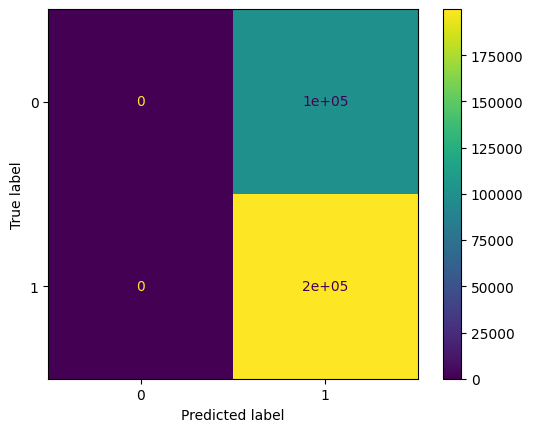

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
